<a href="https://colab.research.google.com/github/anderson-ferreira-83/Data_Science_Repo_anderson83/blob/main/1_Alura_Voz/Week_4_model_validation/p4_Optimization_for_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 4 - Optimization

In [ ]:
#
import os
import sys

In [ ]:
#
import pandas as pd

For the final presentation of our analysis for Alura Voice, we need to define the best model and use the best hyperparameters in it.

### Importing libraries

For the application we will use `pandas`, `seaborn`, `sklearn`, `imblearn` and `sys`.

In [ ]:
#
str_utils = '1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J'

In [ ]:
#
!gdown --id $str_utils

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J
From (redirected): https://drive.google.com/uc?id=1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J&confirm=t&uuid=650ab4cf-ec94-4f83-9e0c-45156c21bb10
To: /content/utils.py
100% 4.43k/4.43k [00:00<00:00, 10.8MB/s]


In [ ]:
#
from utils import plot_countplot,plot_matrix_confusion, compare_models_metrics

In [ ]:
#
import numpy as np
import pandas as pd
#
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#
SEED = 42

## Optimizing the model

Knowing that it is necessary to choose the best developed model, we will analyze the result obtained in the [previous study](https://github.com/sthemonica/challenge_dados_1/blob/bruno/3-Modelos%20de%20ML/modelos.ipynb), ordered by the Recall value:

<h3>Table of models ordered by Recall</h3>

|    | Model          | Training Accuracy | Test Accuracy | Precision | Recall | F1-Score |
|---:|:---------------|------------------:|--------------:|----------:|-------:|---------:|
|  0 | random forest  |              0.81 |          0.80 |      0.77 |   0.85 |     0.81 |
|  1 | decision tree  |              0.81 |          0.80 |      0.78 |   0.85 |     0.81 |
|  2 | svc            |              0.75 |          0.75 |      0.73 |   0.78 |     0.75 |


***Recall*** is a metric that evaluates whether positive predictions were given correctly, that is, it evaluates the number of True Positives (True Pos) and False Negatives (False Neg). Therefore, the higher the Recall, the more correct the model obtained.

Therefore, we will use the model that obtained the best Recall, therefore, Random Forest.

Having chosen the best model, we will use [GridSearchCV](https://cursos.alura.com.br/course/machine-learning-otimizacao-de-modelos-atraves-de-hiperparametros/task/48715) to optimize it.

Now, let's read the dataset worked on in the previous notebook `models.ipynb` through the pandas `read_json` method:

In [ ]:
#
str_data_telco_cust_churn_balanc_file = '1pwoPlr7KE5mIuTae54mJYxVfe9nC-BzQ'

In [ ]:
#
!gdown --id $str_data_telco_cust_churn_balanc_file

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pwoPlr7KE5mIuTae54mJYxVfe9nC-BzQ
To: /content/Telco-Customer-Churn-balancing.json
100% 2.47M/2.47M [00:00<00:00, 74.1MB/s]


In [ ]:
data = pd.read_json('Telco-Customer-Churn-balancing.json')
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Churn
0,1,0,1,1,9,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,0,0,0,0,9,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,0,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
4,1,1,1,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1


To optimize the model, we first need to create the training and testing set. In this way, we divide the dataset into input (X) and output (y), or target.

In [ ]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

And so we can separate the data into training and testing with `train_test_split`.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

It is necessary to define the hyperparameters to be optimized by GridSearchCV, which are:

* **`n_estimators`**: number of decision trees;
* **`criterion`**: decision criterion;
* **`max_features`**: maximum number of variables to be used when searching for the best division;
* **`max_depth`**: maximum depth of the decision tree;
* **`min_samples_split`**: minimum number of samples required for a division to be made;
* **`min_samples_leaf`**: minimum number of samples required for a leaf to be formed;
* **`bootstrap`**: indicates whether data resampling was performed when creating the decision tree models.

In [ ]:
n_estimators = np.arange(100, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "log2"]
max_depth = list(np.arange(2, 10, step=2))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

Now, we can use the GridSearchCV optimizer to improve the *Recall* metric. To do this, we created a GridSearchCV object and passed our model, the hyperparameters defined previously, and the metric to be optimized, *Recall*, as parameters. We also performed the adjustment using the `fit()` method.

To learn more about GridSearchCV and its parameters, you can consult the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
clf = GridSearchCV(RandomForestClassifier(random_state=SEED), parameters, cv=3, n_jobs=-1, scoring="recall")
clf.fit(x_train, y_train)  # ajuste com os dados de treino

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1920 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             scoring='recall')

After the adjustment, we were able to analyze the results obtained:

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1244,1.397926,0.266690,0.069844,0.005023,False,entropy,8,log2,2,2,180,"{'bootstrap': False, 'criterion': 'entropy', '...",0.893846,0.886241,0.883167,0.887751,0.004489,1
1249,1.992753,0.254479,0.100552,0.029204,False,entropy,8,log2,2,4,180,"{'bootstrap': False, 'criterion': 'entropy', '...",0.893846,0.886241,0.883167,0.887751,0.004489,1
1248,1.111463,0.023576,0.060814,0.000874,False,entropy,8,log2,2,4,160,"{'bootstrap': False, 'criterion': 'entropy', '...",0.892308,0.886241,0.882398,0.886982,0.004079,3
1243,1.100085,0.009217,0.064422,0.004765,False,entropy,8,log2,2,2,160,"{'bootstrap': False, 'criterion': 'entropy', '...",0.892308,0.886241,0.882398,0.886982,0.004079,3
938,1.034812,0.048484,0.063630,0.002296,False,gini,8,log2,2,8,160,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.896923,0.885473,0.877018,0.886471,0.008157,5


To obtain the best results from the optimizer we use the **`best_params_`** command:

In [ ]:
clf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 180}

With this, we were able to create a Random Forest estimator with the best hyperparameters:

In [ ]:
rforest = RandomForestClassifier(**clf.best_params_, random_state=SEED)

In [ ]:
model = rforest.fit(x_train, y_train)  # treinamento com os dados de treino
y_pred = rforest.predict(x_test)  # realizando as predições

We can analyze whether the model actually obtained better results in the *Recall* metric using the `plot_matriz_confusao` function:

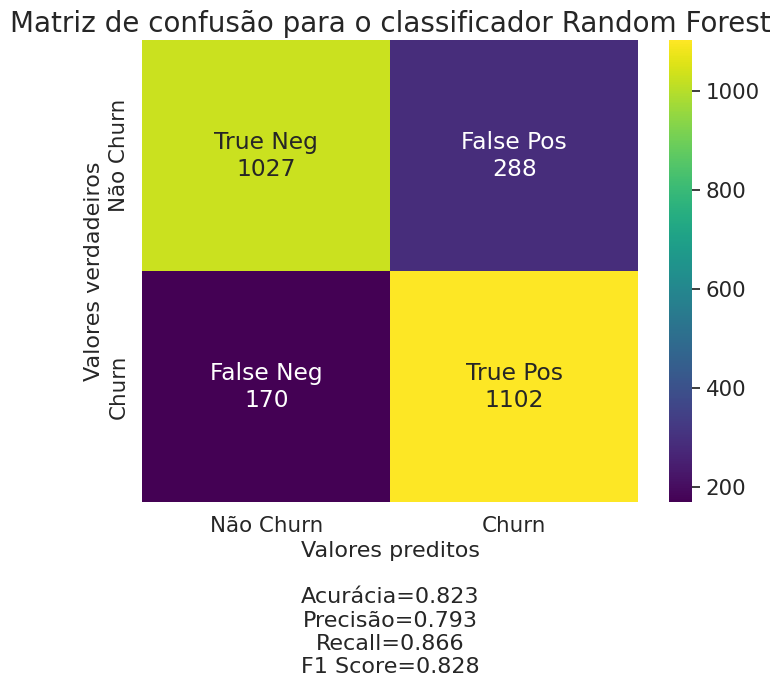

In [ ]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]
plot_matrix_confusion(y_test,
                      y_pred,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Matriz de confusão para o classificador Random Forest")

In [ ]:
print(f"Training accuracy: {rforest.score(x_train, y_train) * 100:.2f}%")  # Checking training accuracy

Training accuracy: 84.80%


It can be seen that recall and other metrics increased with the optimized model.

<h4>Before optimization</h4>

|    | Model          | Training Accuracy | Test Accuracy | Precision | Recall | F1-Score |
|---:|:---------------|------------------:|--------------:|----------:|-------:|---------:|
|  0 | random forest  |              0.81 |          0.80 |      0.77 |   0.85 |     0.81 |




<h4>After optimization</h4>

|    | Model          | Training Accuracy | Test Accuracy | Precision | Recall | F1-Score |
|---:|:---------------|------------------:|--------------:|----------:|-------:|---------:|
|  0 | random forest  |              0.85 |          0.82 |      0.79 |   0.86 |     0.83 |


This way, we were able to create a well-optimized model and present it to Alura Vocing.